/home/kianmilani/Projects/apra-howfsc-models/apra_pop_models


<Quantity 277.69230769 mm>

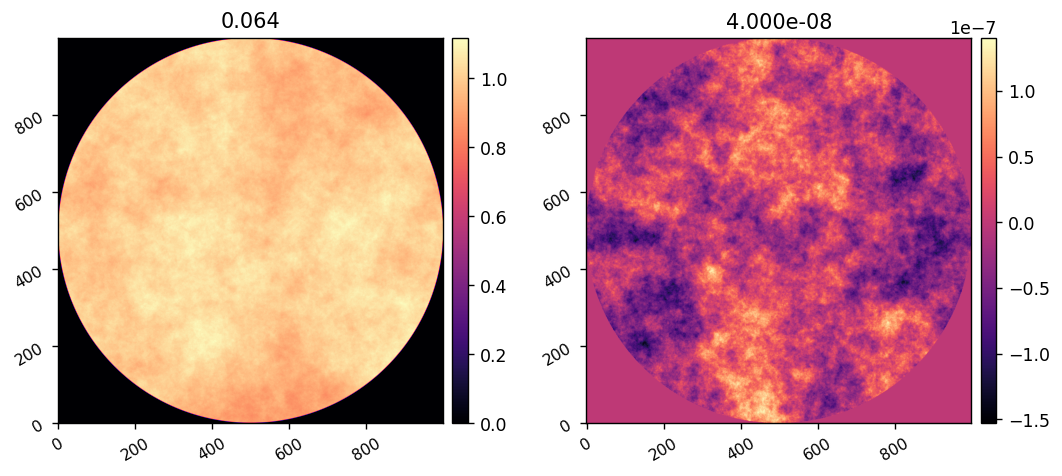

In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
import apra_pop_models.fraunhofer_coro_2dm as fraunhofer
from apra_pop_models.math_module import xp, _scipy, ensure_np_array
import apra_pop_models.utils as utils

from apra_pop_models.imshows import *

pupil_diam = 9.5*u.mm
wavelength_c = 650e-9*u.m

FN = 500
optimal_dm1_dm2 = (pupil_diam**2/(wavelength_c*FN)).to(u.mm)
display(optimal_dm1_dm2)

reload(utils)
WFE = utils.generate_wfe(diam=pupil_diam, npix=1000, oversample=1,
                         opd_index=2.75, amp_index=2.75, 
                         opd_seed=123, amp_seed=1234,
                         opd_rms=40*u.nm, amp_rms=0.05, 
                         wavelength=wavelength_c)

wfe_mask = xp.abs(WFE)>0
wfe_amp = xp.abs(WFE)
wfe_opd = xp.angle(WFE)*wavelength_c.to_value(u.m)/(2*np.pi)
rms_amp = xp.sqrt(xp.mean(xp.square(wfe_amp[wfe_mask]-1)))
rms_opd = xp.sqrt(xp.mean(xp.square(wfe_opd[wfe_mask])))
imshow2(wfe_amp, wfe_opd,  f'{rms_amp:.3f}', f'{rms_opd:.3e}')

1073
2048
(2048, 2048)


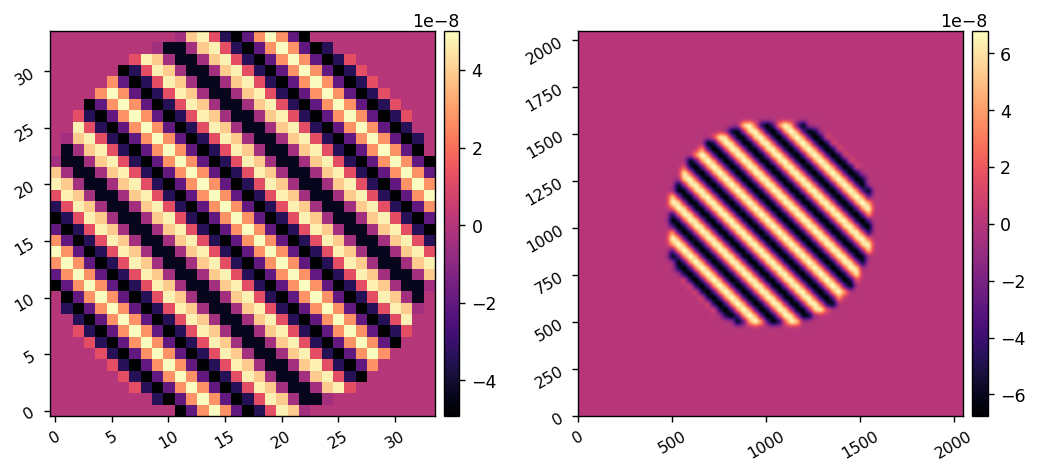

In [48]:

pup_ratio = model.pupil_diam.to_value(u.m)/model.dm_active_diam.to_value(u.m)
xpp = (xp.arange(-model.Nact//2, model.Nact//2) + 1/2)/pup_ratio
ppx, ppy = xp.meshgrid(xpp,xpp)
amp = 5e-8
separation = 5
comm1 = amp*xp.cos(2*np.pi*(ppx + ppy)*separation/model.Nact)*xp.array(model.dm_mask)
comm2 = amp*xp.cos(2*np.pi*(ppx - ppy)*separation/model.Nact)*xp.array(model.dm_mask)

model.set_dm1(ensure_np_array(comm1))
model.set_dm2(ensure_np_array(comm2))

imshow2(model.get_dm1(), model.DM1.get_surface())

31.578947368421048
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
1073
2048
(2048, 2048)
1073
2048
(2048, 2048)


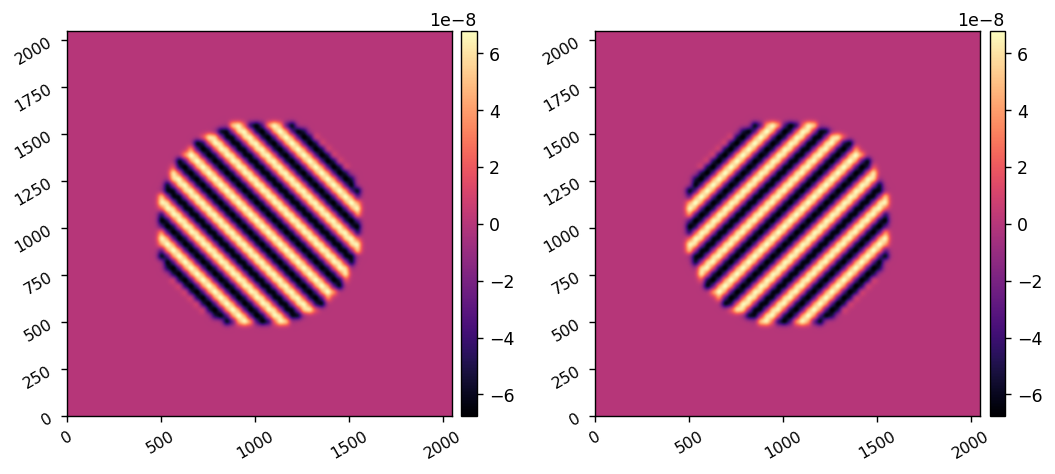

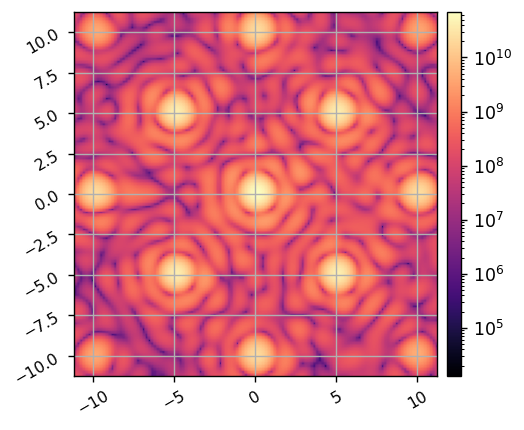

In [52]:
reload(fraunhofer)
model = fraunhofer.CORO()

model.WFE = WFE

pup_ratio = model.pupil_diam.to_value(u.m)/model.dm_active_diam.to_value(u.m)
xpp = (xp.arange(-model.Nact//2, model.Nact//2) + 1/2)/pup_ratio
ppx, ppy = xp.meshgrid(xpp,xpp)
amp = 5e-8
separation = 5
comm1 = amp*xp.cos(2*np.pi*(ppx + ppy)*separation/model.Nact)*xp.array(model.dm_mask)
comm2 = amp*xp.cos(2*np.pi*(ppx - ppy)*separation/model.Nact)*xp.array(model.dm_mask)

model.set_dm1(ensure_np_array(comm1))
model.set_dm2(ensure_np_array(comm2))


wfs = model.calc_wfs()
imshow1(xp.abs(wfs[-1])**2, lognorm=True, pxscl=model.psf_pixelscale_lamD, grid=True)



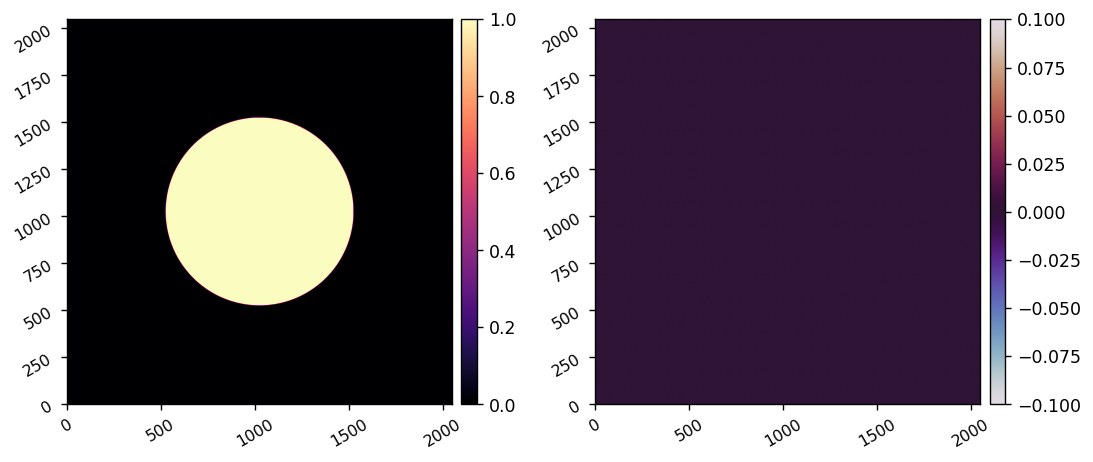

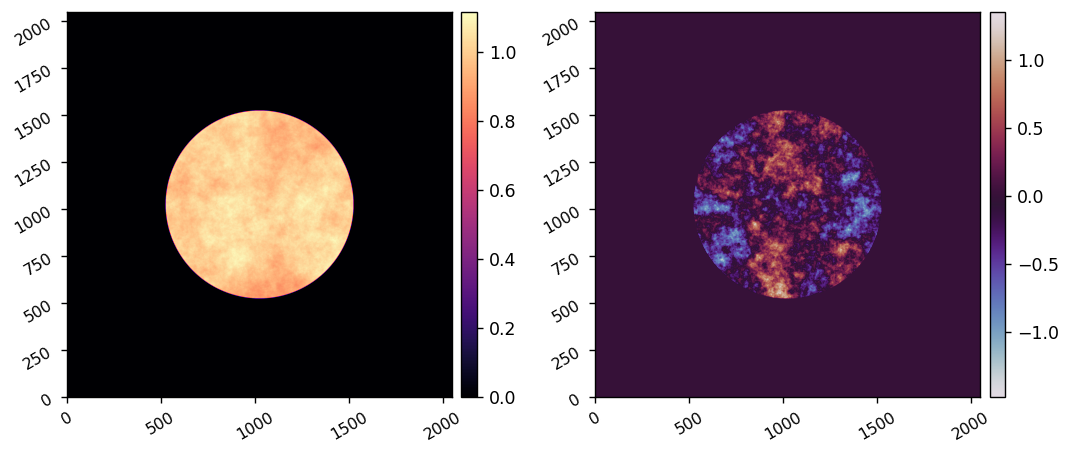

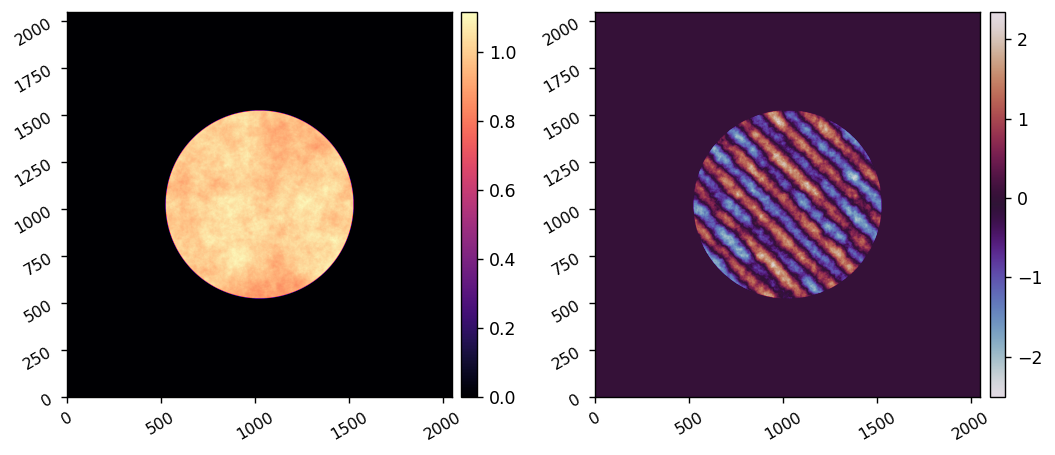

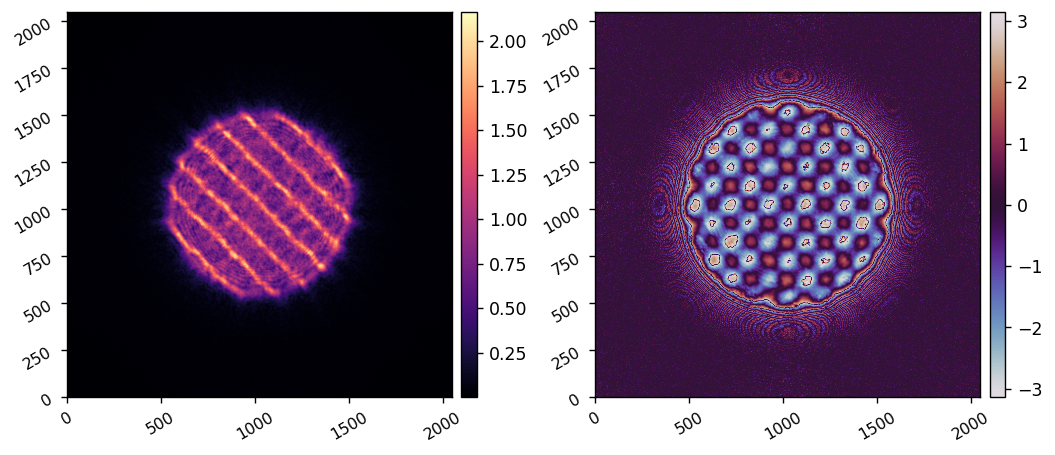

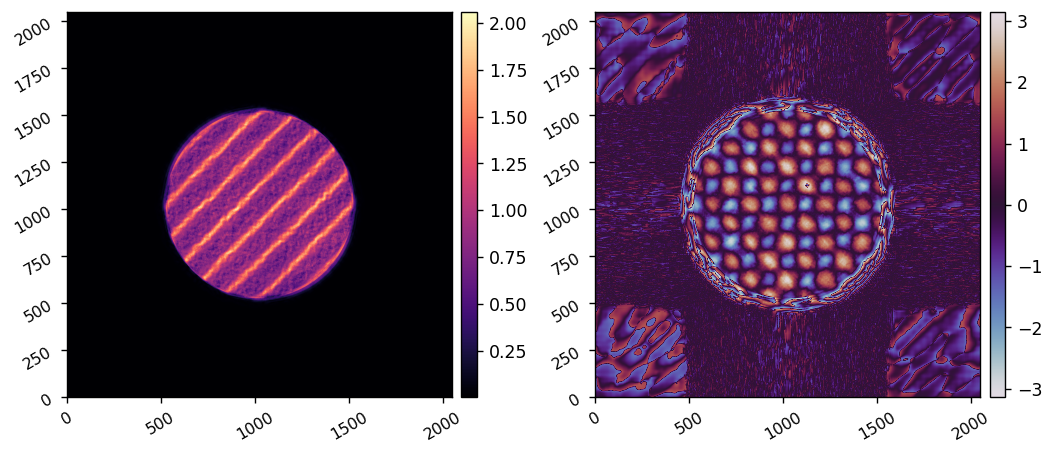

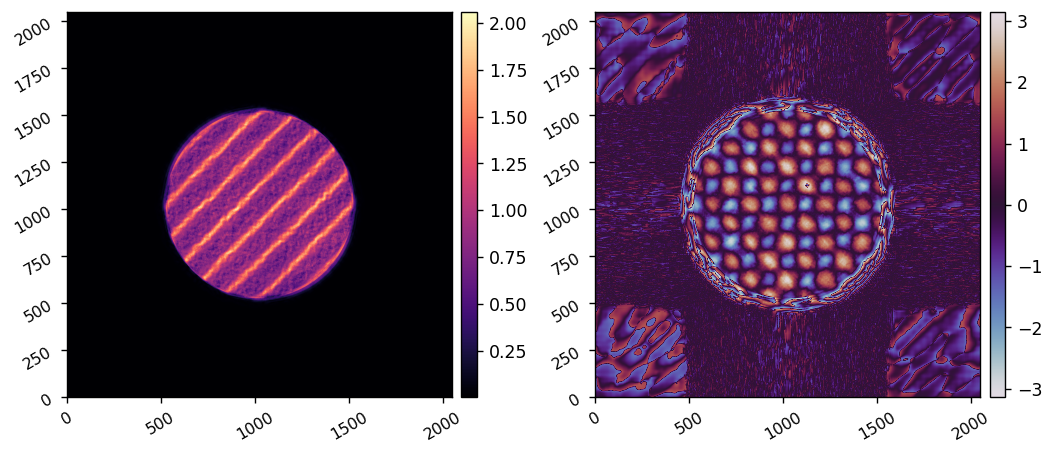

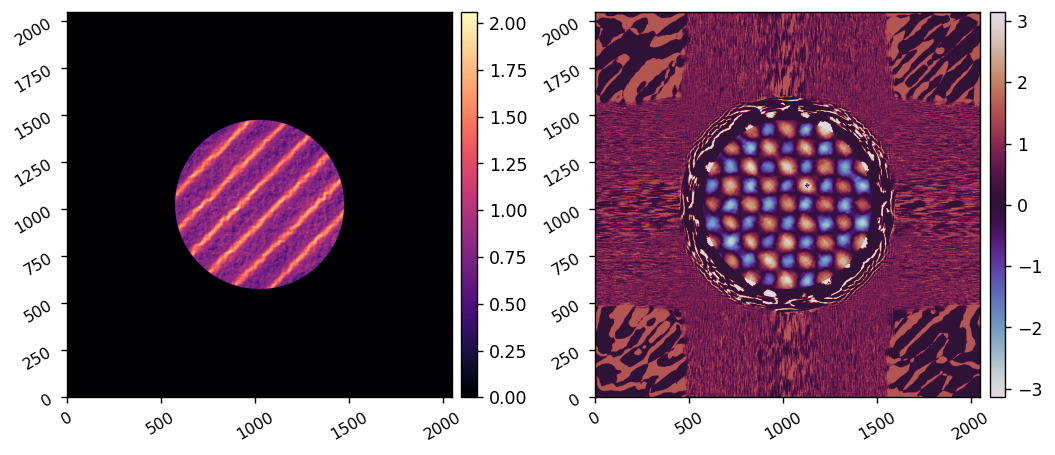

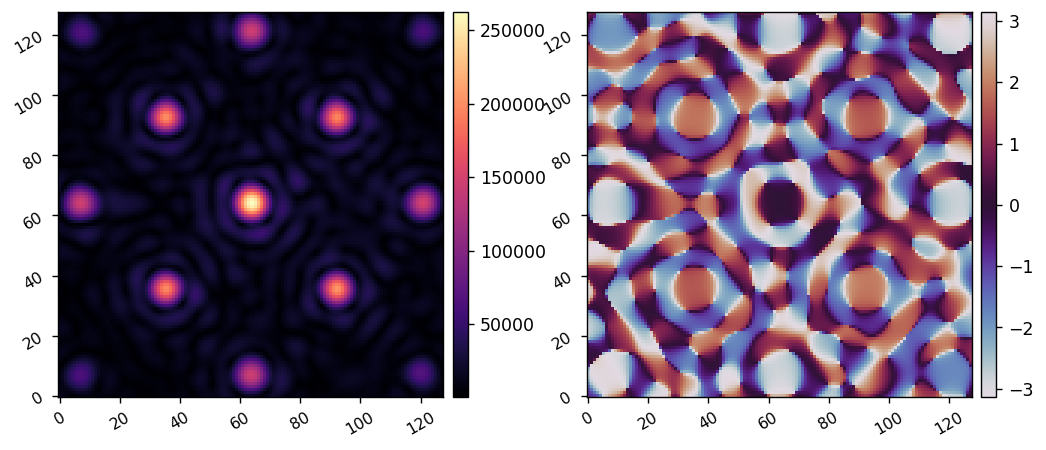

In [53]:
for i,wf in enumerate(wfs):
    imshow2(xp.abs(wf), xp.angle(wf),
            cmap1='magma', cmap2='twilight')